## Un poco de contexto...

En esta etapa empecé extrayendo la información suministrada por la compañia Valve Corporation, creadora de la plataforma Steam la cual fue lanzada en septiembre de 2003 (más de 20 años en el mercado) siendo en la actualidad  una de las plataformas más populares para la distribucion de videojuegos en formanto digital.

Los usuarios de Steam pueden comprar, descargar e instalar juegos directamente a través de la plataforma. Además de juegos, Steam también ofrece software, contenido multimedia y otros productos relacionados con el entretenimiento. La plataforma también proporciona funciones sociales, como chat, grupos y perfiles de usuario, lo que permite a los jugadores conectarse entre sí.

Una característica distintiva de Steam es su enfoque en los juegos multijugador en línea, facilitando la conexión de jugadores de todo el mundo. Steam también ha introducido funciones como Steam Workshop, que permite a los usuarios crear y compartir contenido para sus juegos favoritos.

En resumen, Steam es una plataforma integral para la distribución y gestión de contenido digital en el ámbito de los videojuegos y el entretenimiento.

### EDA(Analisis Exploratorio de datos)

Despues de tener un contexto global de la empresa en la que trabajaré, es necesario dar un vistazo inicial de la data que me han suministrado, en este caso una carpeta comprimida con tres archivos formato json los cuales ire analizando paso a paso

## output_steam_games.json

In [2]:
# Importó librerias

import pandas as pd  # Importo la biblioteca pandas y la renombro como pd para facilitar su uso.
import numpy as np  # Importo la biblioteca numpy y la renombro como np para facilitar su uso.
import json  # Importo el módulo json para manejar datos en formato JSON.
import ast  # Importo el módulo ast (Abstract Syntax Trees) para analizar expresiones literales de Python.
import matplotlib.pyplot as plt  # Importo el módulo pyplot de la biblioteca matplotlib y lo renombro como plt para facilitar su uso.
from matplotlib.ticker import PercentFormatter  # Importo la clase PercentFormatter del módulo ticker de la biblioteca matplotlib para formatear ejes en porcentajes.
import seaborn as sns  # Importo la biblioteca seaborn para realizar gráficos estadísticos atractivos.
from scipy.stats import norm  # Importo la función norm del módulo stats de la biblioteca scipy para trabajar con distribuciones normales.
import warnings  # Importo el módulo warnings para manejar advertencias.
warnings.filterwarnings('ignore')  # Configuro el filtro para ignorar todas las advertencias.
pd.options.display.max_columns = None # Opcion para mostrar todas las columnas de un dataframe



In [3]:
lista = []  # cree una lista vacía para almacenar los datos


with open("Data/output_steam_games.json", "r", encoding="utf-8") as file:
   
    lista = [json.loads(line) for line in file.readlines()]


#Creo un data frame temporal
dataTemp = pd.DataFrame(lista)


dataTemp.head(3) # Reviso el cabezote y observo solo datos sin asignar

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataTemp.tail(3) # Reviso la cola de el dataframe 

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"
120444,NaN,NaN,Maze Run VR,NaN,http://store.steampowered.com/app/681550/Maze_...,NaN,"[Early Access, Adventure, Indie, Action, Simul...",http://steamcommunity.com/app/681550/reviews/?...,"[Single-player, Stats, Steam Leaderboards, HTC...",4.99,True,681550,NaN


In [5]:
dfOutputSteamGames = pd.DataFrame(dataTemp) # Creo el data frame con el que trabajare

In [6]:
dfOutputSteamGames.shape # Reviso dimensiones del data set 

(120445, 13)

In [7]:
dfOutputSteamGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     24083 non-null  object
 1   genres        28852 non-null  object
 2   app_name      32133 non-null  object
 3   title         30085 non-null  object
 4   url           32135 non-null  object
 5   release_date  30068 non-null  object
 6   tags          31972 non-null  object
 7   reviews_url   32133 non-null  object
 8   specs         31465 non-null  object
 9   price         30758 non-null  object
 10  early_access  32135 non-null  object
 11  id            32133 non-null  object
 12  developer     28836 non-null  object
dtypes: object(13)
memory usage: 11.9+ MB


In [8]:
from tools import countNulls
countNulls(dfOutputSteamGames, decimales=2)

,Columna,Número de Nulos,Porcentaje de Nulos
publisher,publisher,96362,80.0%
genres,genres,91593,76.05%
app_name,app_name,88312,73.32%
title,title,90360,75.02%
url,url,88310,73.32%
release_date,release_date,90377,75.04%
tags,tags,88473,73.46%
reviews_url,reviews_url,88312,73.32%
specs,specs,88980,73.88%
price,price,89687,74.46%


In [9]:
from tools import countDuplicates
countDuplicates(dfOutputSteamGames) 

,Columna,Cantidad de Duplicados,Porcentaje de Duplicados
0,publisher,112205,93.16
1,genres,119561,99.27
2,app_name,88350,73.35
3,title,90390,75.05
4,url,88309,73.32
5,release_date,116862,97.03
6,tags,105049,87.22
7,reviews_url,88312,73.32
8,specs,115795,96.14
9,price,120282,99.86


Hasta el momento he mirado el tamaño y composicion de la data sumninistrada, he contabilizado cantidad de datos nulos y datos duplicados, los cuales tienen un porcentaje demasiado alto; en este caso los eliminare para optmizar los procesos a seguir.

In [10]:
dfOutputSteamGames = dfOutputSteamGames.dropna(how="all")

In [11]:
dfOutputSteamGames # Se eliminaron 88309 registros antes = (120445, 13) / despues 32135 rows × 13 columnas.

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域
88314,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"


In [12]:

countNulls(dfOutputSteamGames, decimales=2) # El porcentaje de nulos bajo considerablemente de un pomedio del 70% al 5% 

,Columna,Número de Nulos,Porcentaje de Nulos
publisher,publisher,8052,25.06%
genres,genres,3283,10.22%
app_name,app_name,2,0.01%
title,title,2050,6.38%
url,url,0,0.0%
release_date,release_date,2067,6.43%
tags,tags,163,0.51%
reviews_url,reviews_url,2,0.01%
specs,specs,670,2.08%
price,price,1377,4.29%


In [13]:
countDuplicates(dfOutputSteamGames) # El porcentaje de Duplicados bajo considerablemente en cantidad mas no en porcentaje, pues algunas columnas
# tienen en comun el desarrollador, el precio, el genero y otras son unicas como id. 

,Columna,Cantidad de Duplicados,Porcentaje de Duplicados
0,publisher,23895,74.36
1,genres,31251,97.25
2,app_name,40,0.12
3,title,2080,6.47
4,url,0,0.00
5,release_date,28552,88.85
6,tags,16739,52.09
7,reviews_url,2,0.01
8,specs,27485,85.53
9,price,31972,99.49


In [14]:
# Analizo que tengo hasta el momento 
dfOutputSteamGames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32135 entries, 88310 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     24083 non-null  object
 1   genres        28852 non-null  object
 2   app_name      32133 non-null  object
 3   title         30085 non-null  object
 4   url           32135 non-null  object
 5   release_date  30068 non-null  object
 6   tags          31972 non-null  object
 7   reviews_url   32133 non-null  object
 8   specs         31465 non-null  object
 9   price         30758 non-null  object
 10  early_access  32135 non-null  object
 11  id            32133 non-null  object
 12  developer     28836 non-null  object
dtypes: object(13)
memory usage: 3.4+ MB


### Realizo un Before and after

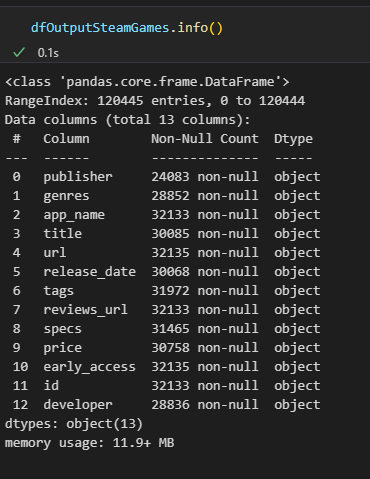 
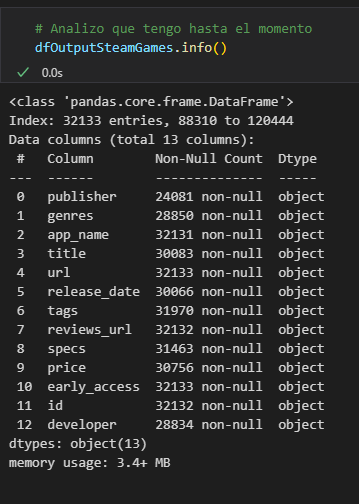

### Aunque se mantienen las mismas 13 columnas el data set se redujo en un 73.38 % sin afectar la integridad de los datos.


### Ya me enfoque en la cantidad ahora me enfocare en la calidad

Todas las columnas son de tipo object(strings) lo cual es acorde con el tipo de dato al que se hace referencia exepto el precio el cual es necesario cambiar a numerico y poder trabajarlo correctamente; lo ideal seria hacer un analisis de correlacion con variables numericas(las cuales no tengo ) pero me enfocare en tres columnas que considero de suma importancia para poder entender que nos dicen los datos en terminos de participacion de las empresas en el mercado, precio y comportamiento del mercado  en los ultimos años.



### Participacion en el mercado

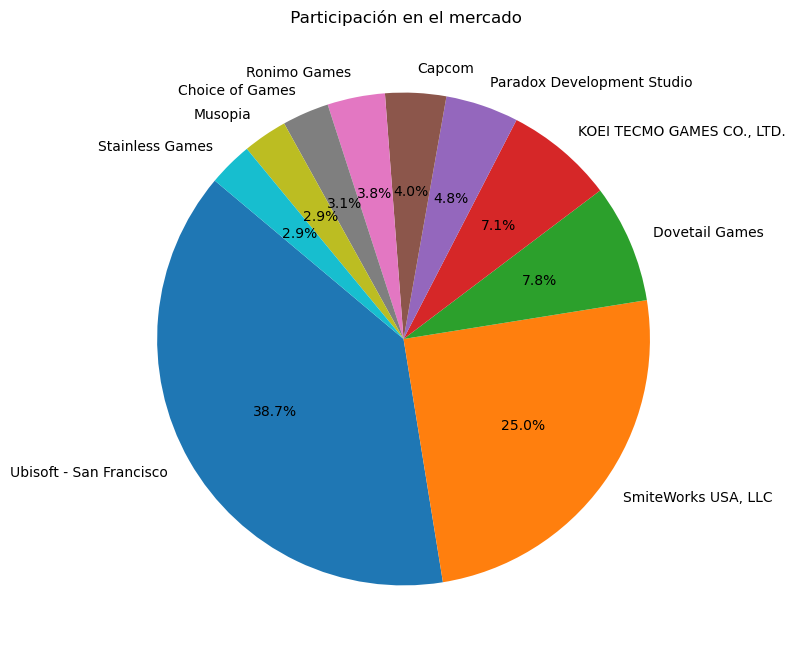

In [16]:

df_devs = dfOutputSteamGames

# Contar el número de juegos por desarrollador
developer_counts = df_devs["developer"].value_counts()

# Calcular el porcentaje de juegos por desarrollador
developer_percentages = developer_counts / len(df_devs)

# Ordenar los desarrolladores por porcentaje
developer_percentages = developer_percentages.sort_values(ascending=False)

# Definir una paleta de colores única para cada desarrollador
colores_desarrolladores = plt.cm.get_cmap("tab10")

# Graficar el gráfico de pastel con colores únicos para cada desarrollador
plt.figure(figsize=(8, 8))
plt.pie(developer_percentages[:10], labels=developer_percentages.index[:10], autopct='%1.1f%%', startangle=140,
        colors=colores_desarrolladores(range(len(developer_percentages[:10]))))
plt.title(" Participación en el mercado")
plt.show()


### Rango de precios 

In [18]:

dfPrice = dfOutputSteamGames.dropna(subset=["price"]) # Extraje la columna 'price'
dfPrice["price"] = pd.to_numeric(df_price["price"], errors='coerce').fillna(0.0) # Casteo de la columna de string a int
dfPrice["price"] = df_price["price"].astype(float) # Casteo de int a float
dfPrice["price"].describe() #Obtengo informacion de la variable numerica



count    30758.000000
mean         8.866855
std         15.903457
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

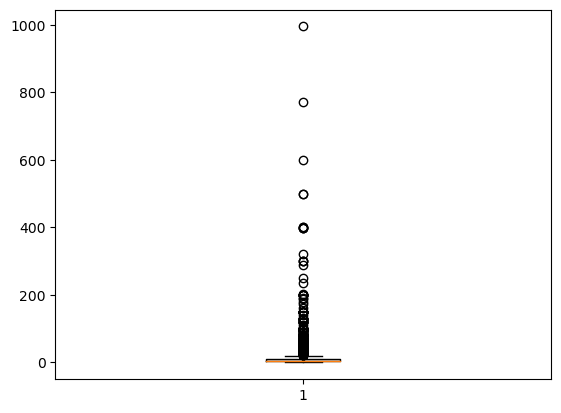

In [19]:
plt.boxplot(df_price["price"])
plt.show()

In [20]:
dfOutputSteamGames['price'] = pd.to_numeric(dfOutputSteamGames['price'], errors='coerce')

# Ordenar el DataFrame en orden descendente por 'price'
dfHiguerValues = dfOutputSteamGames.sort_values(by='price', ascending=False)

# Mostrar los 10 valores más altos de la columna 'price' en formato DataFrame
print("Los 10 valores más altos de la columna 'price':")
print(dfHiguerValues[['price']].head(10))


Los 10 valores más altos de la columna 'price':
         price
100398  995.00
90702   771.71
111904  599.00
106104  499.99
102614  499.99
97385   399.99
97384   399.99
102065  399.00
104156  399.00
97727   399.00


In [21]:
dfOutputSteamGames['price'] = pd.to_numeric(dfOutputSteamGames['price'], errors='coerce')

# Ordenar el DataFrame en orden ascendente por 'price'
df_valores_mas_bajos = dfOutputSteamGames.sort_values(by='price', ascending=True)

# Mostrar los 10 valores más bajos de la columna 'price' en formato DataFrame
print("Los 10 valores más bajos de la columna 'price':")
print(df_valores_mas_bajos[['price']].head(10))


Los 10 valores más bajos de la columna 'price':
        price
112252   0.49
113933   0.49
92333    0.50
92165    0.89
104416   0.95
110516   0.98
91372    0.98
115812   0.99
107659   0.99
104468   0.99


Observamos que del total de los registros hay 5 valores por encima de los 399.99 que podemos hacer con ellos para no afectar las metricas?  En el Etl me encargare de ellos


In [22]:
# Establecer un límite superior para los valores de 'price'
valor_maximo_aceptable = 399.99
dfOutputSteamGames['price_capped'] = dfOutputSteamGames['price'].apply(lambda x: min(x, valor_maximo_aceptable))


In [23]:
mediana = df_price["price"].median()
print(f" el valor de la mediana es: {mediana}")

 el valor de la mediana es: 4.99


### Comportamiento del mercado en los ultimos 20 años 

In [24]:
dfOutputSteamGames[['release_date']] # Analizo la columna que quiero trabajar y me intereso en extraer el año

,release_date
88310,2018-01-04
88311,2018-01-04
88312,2017-07-24
88313,2017-12-07
88314,NaN
...,...
120440,2018-01-04
120441,2018-01-04
120442,2018-01-04
120443,2017-09-02


In [25]:
# Creo una nueva columna 'yearOfPublication' extrayendo el año de la columna 'release_date'
dfOutputSteamGames["yearOfPublication"] = dfOutputSteamGames["release_date"].str.extract(r"(\d{4})")


In [26]:
# Elimino la columna 'release_date', ya que obtuve la información del año en 'yearOfPublication'
dfOutputSteamGames.drop("release_date", axis=1, inplace=True)


In [27]:
# Eliminar filas con valores nulos en la columna 'yearOfPublication'
dfOutputSteamGames= dfOutputSteamGames.dropna(subset=['yearOfPublication'])


In [28]:

# Convertimos la columna 'yearOfPublication' a tipo entero
dfOutputSteamGames["yearOfPublication"] = dfOutputSteamGames["yearOfPublication"].astype(int)

In [29]:
greater2021= dfOutputSteamGames["yearOfPublication"][dfOutputSteamGames["yearOfPublication"] > 2021] #Filtro valores mayores a 2021
greater2021 # identifico un valor que puede afectar gravemente mis metricas o grafica


101738    5275
Name: yearOfPublication, dtype: int32

In [30]:
locationValues = dfOutputSteamGames.loc[101738:101740, 'yearOfPublication'] # Muestro los valores de las ubicaciones 101738 y 101739
locationValues # Veo el valor que le sigue en este caso año 2017 para asignarselo tambien

101738    5275
101740    2017
Name: yearOfPublication, dtype: int32

In [31]:
dfOutputSteamGames.at[101738, 'yearOfPublication'] = 2017 # Reemplazo el valor en la posición 101738 con 2017

In [32]:

year_counts = dfOutputSteamGames['yearOfPublication'].value_counts() # Cuento los años
df_year_counts = pd.DataFrame({'Year': year_counts.index, 'Number of Releases': year_counts.values}) # Cuento la cantidad de lanzamientos
df_filtered_year_counts = df_year_counts[df_year_counts['Number of Releases'] >= 80] # Filtrar registros que tengan 'Number of Releases' mayor o igual a 80
df_filtered_year_counts.head() # Mostrar el DataFrame resultante



,Year,Number of Releases
0,2017,9596
1,2016,6943
2,2015,4952
3,2014,2844
4,2013,1552


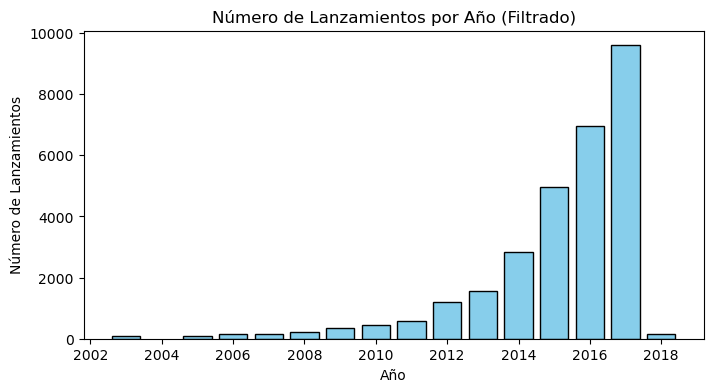

In [34]:

# Creo un gráfico de barras con df_filtered_year_counts
plt.figure(figsize=(8, 4))
plt.bar(df_filtered_year_counts['Year'], df_filtered_year_counts['Number of Releases'], color='skyblue', edgecolor='black')
plt.title('Número de Lanzamientos por Año (Filtrado)')
plt.xlabel('Año')
plt.ylabel('Número de Lanzamientos')
plt.show()


### Ahora analizo los generos 

In [35]:

df_expanded_genres = dfOutputSteamGames.explode("genres") # Aplicar explode a la columna 'genres' para desglosar las listas
unique_genres_counts = df_expanded_genres["genres"].value_counts() # Contar la frecuencia de cada género único
unique_genres_counts


genres
Indie                        15764
Action                       11257
Casual                        8256
Adventure                     8195
Strategy                      6930
Simulation                    6680
RPG                           5451
Free to Play                  2026
Early Access                  1446
Sports                        1254
Massively Multiplayer         1105
Racing                        1080
Design &amp; Illustration      460
Utilities                      338
Web Publishing                 268
Animation &amp; Modeling       183
Education                      125
Video Production               116
Software Training              105
Audio Production                93
Photo Editing                   77
Accounting                       7
Name: count, dtype: int64

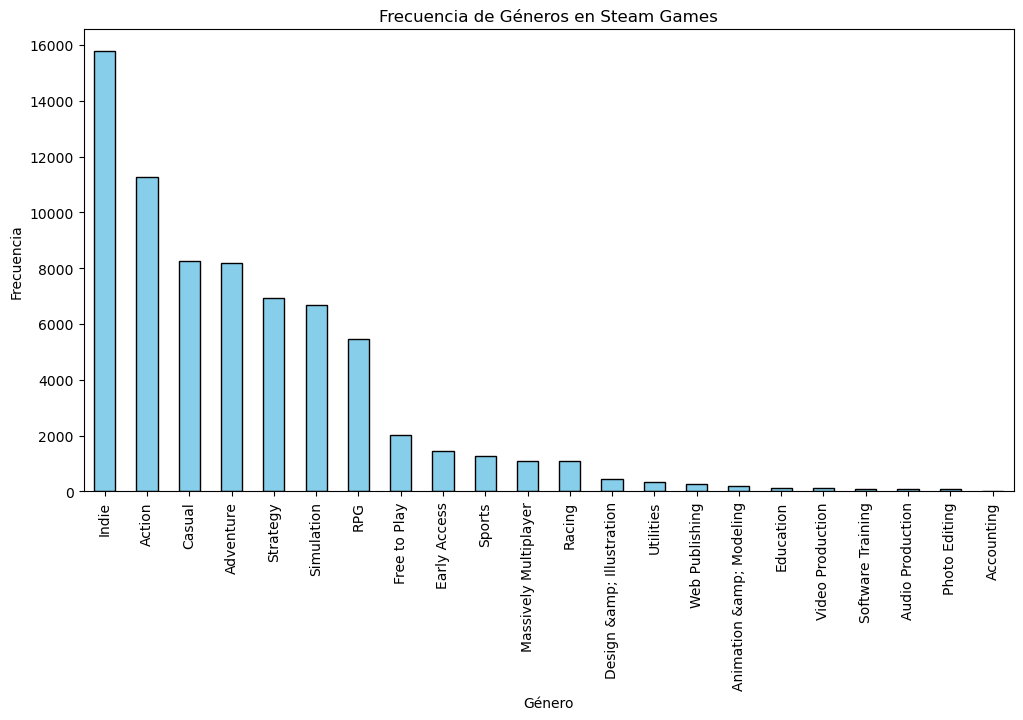

In [36]:
# Creo un gráfico de barras
plt.figure(figsize=(12, 6))
unique_genres_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia de Géneros en Steam Games')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

## australian_user_reviews.json

In [37]:
# Hacemos la lectura del JSON
lista = []
with open("Data/australian_user_reviews.json", "r", encoding="utf-8") as file:
    for line in file:
        lista.append(ast.literal_eval(line))

dfTemp2 = pd.DataFrame(lista)

In [38]:
dfAustralianUser = pd.DataFrame(dfTemp2) # Creo el data frame que voy a trabajar
dfAustralianUser # Doy un primer vistazo

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [39]:
countNulls(dfAustralianUser) # Reviso Nulos, aparentemente nada paso a revisar casda columna.

,Columna,Número de Nulos,Porcentaje de Nulos
user_id,user_id,0,0.0%
user_url,user_url,0,0.0%
reviews,reviews,0,0.0%


In [40]:
dfAustralianUser["reviews"][0]

[{'funny': '',
  'posted': 'Posted November 5, 2011.',
  'last_edited': '',
  'item_id': '1250',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'},
 {'funny': '',
  'posted': 'Posted July 15, 2011.',
  'last_edited': '',
  'item_id': '22200',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': "It's unique and worth a playthrough."},
 {'funny': '',
  'posted': 'Posted April 21, 2011.',
  'last_edited': '',
  'item_id': '43110',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!'}]

In [41]:
dfAustralianUser = dfAustralianUser.explode("reviews").reset_index() # Aplico el metodo explode para desanidar 
dfAustralianUser = pd.concat([dfAustralianUser.drop(columns="reviews"), dfAustralianUser["reviews"].apply(pd.Series)],axis=1) # Concatenamos el resultado con el DF original y borramos la columna "reviews" con datos anidados
dfAustralianUser # Reviso


,index,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0
0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,NaN
1,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,NaN
2,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,NaN
3,1,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,NaN
4,1,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
59328,25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,NaN
59329,25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,NaN
59330,25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,NaN
59331,25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D,NaN


####  Observo demasiados duplicados, despues de revisar el diccionario de datos noto que el user id aunque es unico no es informacion contundente que describa el negocio(por el momento) pues divide por usuario, al igual que el URL de el, decido enfocarme en los datos desanidados y simples de los reviews que me clasificaria en base a calificaciones dadas por los usuarios un Insigh valioso recomendados vs no recomendados.

In [42]:
countDuplicates(dfAustralianUser ) 

,Columna,Cantidad de Duplicados,Porcentaje de Duplicados
0,index,33534,56.52
1,user_id,33848,57.05
2,user_url,33848,57.05
3,funny,59146,99.68
4,posted,57426,96.79
5,last_edited,58317,98.29
6,item_id,55650,93.79
7,helpful,57988,97.73
8,recommend,59330,99.99
9,review,4019,6.77


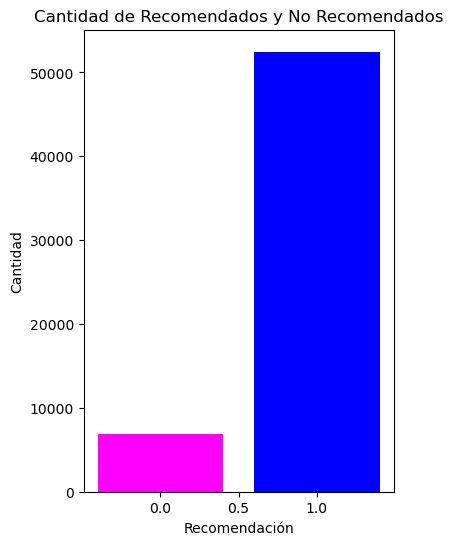

In [44]:
recomendationUser = dfAustralianUser["recommend"].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(4, 6))
plt.bar(recomendationUser.index, recomendationUser, color=['blue', 'magenta'])

# Agregar etiquetas y título
plt.xlabel('Recomendación')
plt.ylabel('Cantidad')
plt.title('Cantidad de Recomendados y No Recomendados')

# Mostrar el gráfico de barras
plt.show()


Es muy desproporcional y no se que tan confiable debe ser este dato, mas sin embargo tengo una vision concreta de la data

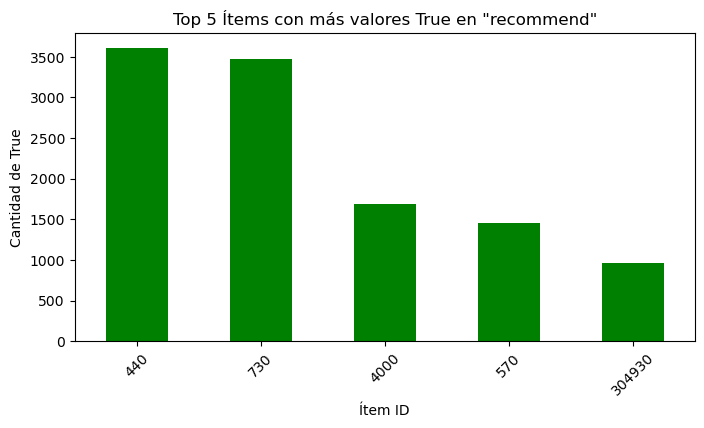

In [45]:

recomendationTrue = dfAustralianUser[dfAustralianUser["recommend"] == True] # Filtro los valores True en la columna "recommend"
countTrue = recomendationTrue["item_id"].value_counts() # Contar los True por "item_id"
topFive = countTrue.head(5)
# Crear un gráfico de barras con los 5 ítems con más valores True
plt.figure(figsize=(8, 4))
topFive.plot(kind="bar", color="green")
plt.title('Top 5 Ítems con más valores True en "recommend"')
plt.xlabel("Ítem ID")
plt.ylabel("Cantidad de True")
plt.xticks(rotation=45)
plt.show()

## australian_users_items.json

In [46]:
# Leo el archivo json 
lista3 = []
with open("Data/australian_users_items.json", "r", encoding="utf-8") as file:
    for line in file.readlines():
        lista3.append(ast.literal_eval(line))

australianUsersItems = pd.DataFrame(lista3)

In [47]:
australianUsersItems # Doy un primer vistazo

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [48]:
australianUsersItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [49]:
countNulls(australianUsersItems) 

,Columna,Número de Nulos,Porcentaje de Nulos
user_id,user_id,0,0.0%
items_count,items_count,0,0.0%
steam_id,steam_id,0,0.0%
user_url,user_url,0,0.0%
items,items,0,0.0%


Desanidando el archivo arroja mas de 5 millones de filas en 8 columnas razon por la cual se trabajara en su normalizacion mas adelante.

In [50]:
# Tras revisar el contenido de la columna items, aplicamos el método "json_normalize() sobre el objeto json lista 3 por la complejidad de la estructura  con diccionarios anidados o listas de diccionarios conservando las otras columnas del DF inicial "
australianUsersItems = pd.json_normalize(lista3, record_path="items", meta=["steam_id", "items_count", "user_id", "user_url"])
australianUsersItems 

,item_id,item_name,playtime_forever,playtime_2weeks,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
...,...,...,...,...,...,...,...,...
5153204,346330,BrainBread 2,0,0,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153205,373330,All Is Dust,0,0,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153206,388490,One Way To Die: Steam Edition,3,3,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...
5153207,521570,You Have 10 Seconds 2,4,4,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...


Como insight principal me enfocare en la columna 'playtime_forever' y "user_id"

In [51]:
australianUsersItems["playtime_forever"] = australianUsersItems["playtime_forever"].astype(int)
australianUsersItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           object
 1   item_name         object
 2   playtime_forever  int32 
 3   playtime_2weeks   int64 
 4   steam_id          object
 5   items_count       object
 6   user_id           object
 7   user_url          object
dtypes: int32(1), int64(1), object(6)
memory usage: 294.9+ MB


In [52]:
playtimeUser = australianUsersItems[["user_id", "playtime_forever"]]
playtimeUser

,user_id,playtime_forever
0,76561197970982479,6
1,76561197970982479,0
2,76561197970982479,7
3,76561197970982479,0
4,76561197970982479,0
...,...,...
5153204,76561198329548331,0
5153205,76561198329548331,0
5153206,76561198329548331,3
5153207,76561198329548331,4


In [53]:
# Enfocando el codigo en el requerimiento 'endpoint def UserForGenre' sumo  el tiempo de juego de cada usuario 
plusPlayTimeUser = playtimeUser.groupby('user_id')['playtime_forever'].sum().reset_index()#Realizo la conversión de los valores en la columna "playtime_forever" de minutos a horas,redondeando a dos decimales, y actualizo la columna con los nuevos valores.
plusPlayTimeUser["playtime_forever"] = round(plusPlayTimeUser["playtime_forever"] / 60, 2)
plusPlayTimeUser

,user_id,playtime_forever
0,--000--,2350.45
1,--ace--,1173.03
2,--ionex--,801.40
3,-2SV-vuLB-Kg,904.15
4,-404PageNotFound-,3854.33
...,...,...
70907,zzonci,7.15
70908,zzoptimuszz,1373.62
70909,zzydrax,77.33
70910,zzyfo,1026.45


In [54]:
int(plusPlayTimeUser["playtime_forever"].mean()) # Promedio de horas por usuario 

1200

In [55]:
dfItemsUser = pd.DataFrame(lista3) # Ahora trabajare con el archivo json transformado en lista
dfItemsUser

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [56]:
dfItemsUser["items_count"].describe()

count    88310.000000
mean        58.353629
std        122.312095
min          0.000000
25%          3.000000
50%         26.000000
75%         73.000000
max       7762.000000
Name: items_count, dtype: float64

Visualizo la distribucion de 'items_count' para ententer que tantos juegos tienen los usuarios, se ven valores extremos y una condensacion de datos hasta el segundo cuartil muy util para analizar mas adelante.

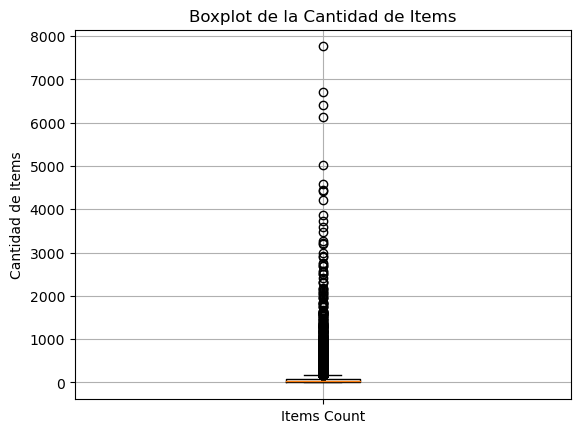

In [57]:
fig, ax = plt.subplots()
ax.boxplot(dfItemsUser["items_count"])
ax.set_xticklabels(["Items Count"])
ax.set_ylabel("Cantidad de Items")
plt.title("Boxplot de la Cantidad de Items")
plt.grid()
plt.show()

In [58]:
int(dfItemsUser["items_count"].mean()) # Media de juegos por usuarios 

58